In [1]:

from keras.preprocessing import image

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

In [3]:
data=pd.read_csv("Train/train.csv")

In [4]:
data.head()

,ImageId,NameOfPokemon
0,296.jpg,Pikachu
1,297.jpg,Pikachu
2,298.jpg,Pikachu
3,299.jpg,Pikachu
4,300.jpg,Pikachu


In [5]:
data=data.values

In [6]:
X=data[:,:-1]
Y=data[:,-1]

In [7]:
import cv2 as cv

In [8]:
path1="Test/Images/"

In [9]:
folder1=glob.glob(path1+"*.jpg")

In [10]:
image_list1=[]
label_list1=[]

In [11]:
for i in folder1:
    
    img = image.load_img(i,target_size=(30,30))
    if img is None:
        print(i)
    # img=image.load_img(i),
    img_arr=image.img_to_array(img)
    image_list1.append(img_arr)
    label=str(i.split("\\")[-1][:])
    label_list1.append([label])

In [12]:
image_list1=np.array(image_list1,dtype='float32')/255.0

In [13]:
#label_list1

In [14]:
#image_list1

In [15]:
image_list1=image_list1.reshape(image_list1.shape[0],-1)

In [16]:
image_id=[]

In [17]:
for i in folder1:
    image_id.append(i[-8:])

In [18]:
image_id[0]

'1100.jpg'

In [19]:
path="Train/Images/"

In [20]:
folder=glob.glob(path+"*.jpg")

In [21]:
image_list=[]

In [22]:
label_list=[]

In [23]:
for i in folder:
    img = image.load_img(i,target_size=(30,30))
    if img is None:
        print(i)
    # img=image.load_img(i),
    img_arr=image.img_to_array(img)
    image_list.append(img_arr)
    label=str(i.split("\\")[-1][:])
    label_list.append([label])
    #value=(int(label[:-4])-296)/100



C:\Users\taran\AppData\Roaming\Python\Python39\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [24]:
image_list=np.array(image_list,dtype='float32')/255.0

In [25]:
print(image_list.shape)

(304, 30, 30, 3)


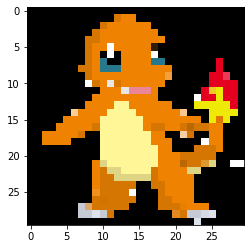

In [26]:
plt.imshow(image_list[282])


In [27]:
label_list=np.array(label_list)

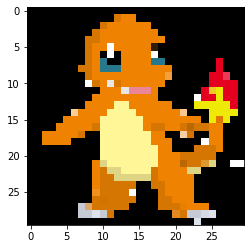

In [28]:
plt.imshow(image_list[282])

In [29]:
Y=np.array(Y)

In [30]:
import random

In [31]:
combined=list(zip(image_list,Y))

In [32]:
random.shuffle(combined)

In [33]:
image_list,Y=zip(*combined)

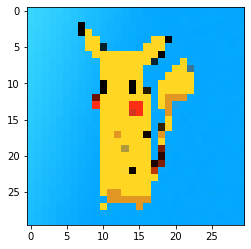

In [34]:
plt.imshow(image_list[282])

In [35]:
#image_list[282]

In [36]:
Y=np.array(Y)
image_list=np.array(image_list,dtype='float32')

In [37]:
#image_list[282]

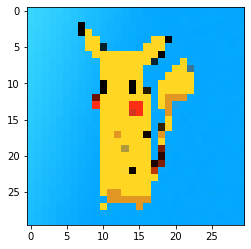

In [38]:
plt.imshow(image_list[282])

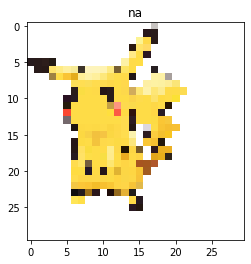

In [39]:
for i in range(10):
    plt.imshow(image_list[i])
    plt.title("na")

In [40]:
print(image_list.shape)

(304, 30, 30, 3)


In [41]:
print(Y.shape)

(304,)


In [42]:
image_list=image_list.reshape(image_list.shape[0],-1)

In [43]:
print(image_list.shape)

(304, 2700)


In [44]:
label_values=[]

In [45]:
class_names={'Bulbasaur':0, 'Charmander':1, 'Pikachu':2}

In [46]:
for i in Y:
    label_values.append(class_names[i])

In [47]:
classes=np.unique(Y)

In [48]:
print(classes)

['Bulbasaur' 'Charmander' 'Pikachu']


In [49]:
def class_wise_Data(x,y,classes):
    data={}
    
    for i in classes:
        data[i]=[]
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
    for keys in data.keys():
        data[keys]=np.array(data[keys])
    return data

In [50]:
data_img=class_wise_Data(image_list,Y,classes)

In [51]:
print(data_img['Bulbasaur'].shape)

(101, 2700)


In [52]:
data_img

{'Bulbasaur': array([[0.5058824 , 0.5058824 , 0.5058824 , ..., 0.5058824 , 0.5058824 ,
         0.5058824 ],
        [0.28235295, 0.69411767, 0.37254903, ..., 0.7529412 , 0.95686275,
         0.8156863 ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.8156863 , 0.87058824, 0.972549  , ..., 0.23529412, 0.63529414,
         0.30588236],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.03529412, 0.25490198, 0.06666667, ..., 0.4745098 , 0.4745098 ,
         0.4745098 ]], dtype=float32),
 'Charmander': array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [0.8235294 , 0.8235294 , 0.8235294 , ..., 0.84313726, 0.84313726,
         0.84313726],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [1.        , 0.        , 0.        , ..., 1.        , 0.8 

## SVM

### One vs one SVM

In [ ]:
class SVM:
    def __init__(self,c=1):
        self.c=c
        self.lr=0
        self.b=0
    def fit(self,x,y,batch_size=25,lr=0.00100,m_itr=1100):
        n_f=x.shape[1]
        n_s=x.shape[0]
        
        c=self.c
        
        w=np.zeros((1,n_f))
        bias=0
        
        losses=[]
        
        for i in range(m_itr):
            l=self.hinge_loss(w,bias,x,y)
            losses.append(l)
            ids=np.arange(n_s)
            np.random.shuffle(ids)
            
            for batch_start in range(0,n_s,batch_size):
                gw=0
                gb=0
                
                for j in range(batch_start,batch_size+batch_start):
                    if j<n_s:
                        i=ids[j]
                        ti=y[i]*(np.dot(w,x[i].T)+bias)
                        
                        if ti>1:
                            gw+=0
                            gb+=0
                        else:
                            gw+=c*y[i]*x[i]
                            gb+=c*y[i]
                            
                w=w-lr*w+lr*gw
                bias+=lr*gb
        self.w=w
        self.b=bias
            
        return w,bias,losses
        
        
    def hinge_loss(self,W,b,x,y):
        loss=0.0
        loss+= .5*np.dot(W,W.T)
        m=x.shape[0]
        for i in range(m):
            ti=y[i]*(np.dot(W,x[i].T)+b)
            loss+=self.c*max(0,(1-ti))
        return loss[0][0]

In [242]:
def get_pair_data(d1,d2):
    l1,l2=d1.shape[0],d2.shape[0]
    sampels=l1+l2
    features=d1.shape[1]
    
    data_pair=np.zeros((sampels,features))
    data_labels=np.zeros(sampels)
    
    
    data_pair[:l1,:]=d1
    data_pair[l1:,:]=d2
    
    data_labels[:l1]=-1
    data_labels[l1:]=1
    
    
    return data_pair,data_labels

In [243]:
list(classes).index('Bulbasaur')

0

In [244]:
mySVM=SVM()

In [245]:
xp,yp=get_pair_data(data_img["Bulbasaur"],data_img["Charmander"])

In [250]:
w,b,loss=mySVM.fit(xp,yp,lr=0.0001,m_itr=500)


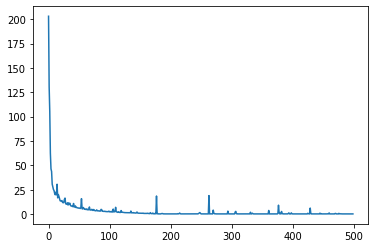

In [251]:
plt.plot(loss)

In [252]:
def trainSVM(x,y):
    
    svm_classifiers={}
    for n,i in enumerate(classes):
        svm_classifiers[i]={}
        for j in classes[n+1:]:
            xpair,ypair=get_pair_data(data_img[i],data_img[j])
            w,b,loss=mySVM.fit(xpair,ypair)
            svm_classifiers[i][j]=(w,b)
    return svm_classifiers

In [253]:
svm_object=trainSVM(image_list,Y)

In [254]:
print(svm_object['Bulbasaur']['Charmander'][0].shape)

(1, 2700)


In [255]:
print(svm_object['Bulbasaur']['Pikachu'][1])

-0.47500000000000026


In [256]:
print(svm_object['Bulbasaur'])

{'Charmander': (array([[-0.00858869,  0.00202381,  0.01046264, ..., -0.01679469,
        -0.00442178,  0.00925703]]), -0.01599999999999986), 'Pikachu': (array([[-0.0030117 ,  0.00075045,  0.00999618, ..., -0.00525129,
        -0.00299578,  0.01031683]]), -0.47500000000000026)}


In [257]:
print(svm_object['Charmander'])

{'Pikachu': (array([[ 0.01460487,  0.01150777,  0.00389433, ...,  0.02215145,
         0.01224909, -0.00443882]]), -1.047999999999999)}


In [258]:
print(svm_object['Pikachu'])

{}


In [259]:
def binaryPredict(x,w,b):
    z=np.dot(x,w.T)+b
    if z>=0:
        return 1
    else:
        return -1
    

In [260]:
def predict(x):
    count=np.zeros((len(classes),))
    
    for n,i in enumerate(classes):
        for m,j in enumerate(classes[n+1:]):
            w,b=svm_object[i][j]
            z=binaryPredict(x,w,b)
            # print(count)
            # print(m+n)
            if z==1:
                count[m+n]+=1
            else:
                count[n]+=1
                
    final_prediction = np.argmax(count)
    return classes[final_prediction]

In [261]:
p=[]
for i in image_list1:
    p.append(predict(i))

In [275]:
#p

In [264]:
#plt.imshow(image_list1[0])

In [265]:
y_=pd.DataFrame(image_id,columns=["ImageId"])

In [266]:
y_


,ImageId
0,1100.jpg
1,1101.jpg
2,1102.jpg
3,1103.jpg
4,1104.jpg
...,...
118,2236.jpg
119,2237.jpg
120,2238.jpg
121,2239.jpg


In [267]:
y_["NameOfPokemon"]=p

In [277]:
y_

,ImageId,NameOfPokemon
0,1100.jpg,Bulbasaur
1,1101.jpg,Bulbasaur
2,1102.jpg,Bulbasaur
3,1103.jpg,Bulbasaur
4,1104.jpg,Bulbasaur
...,...,...
118,2236.jpg,Charmander
119,2237.jpg,Bulbasaur
120,2238.jpg,Charmander
121,2239.jpg,Charmander


In [269]:
print(Y[12])

Charmander


In [270]:
def accuracy(x,y):
    count=0
    for i in range(x.shape[0]):
        prediction=predict(x[i])
        if prediction==y[i]:
            count+=1
    return count/x.shape[0]

In [271]:
accuracy(image_list,Y)

0.6578947368421053

In [284]:
y_.set_index("ImageId", inplace = True)

In [288]:
test_data=pd.read_csv("Test/test.csv")

,ImageId
0,1106.jpg
1,2236.jpg
2,1131.jpg
3,2221.jpg
4,2011.jpg


In [290]:
names=[]

In [291]:
for i in test_data["ImageId"]:
    names.append(y_.loc[i]["NameOfPokemon"])

In [292]:
test_data["NameOfPokemon"]=names

In [293]:
test_data.head()

,ImageId,NameOfPokemon
0,1106.jpg,Bulbasaur
1,2236.jpg,Charmander
2,1131.jpg,Bulbasaur
3,2221.jpg,Charmander
4,2011.jpg,Charmander


In [296]:
test_data.to_csv("submit_1.csv",index=False)

## Neural networks

In [53]:
def softmax(a):
    e_pa=np.exp(a)
    ans=e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [54]:
class neural_Networks:
    def __init__(self,input_size,layers,output_size):
        
        np.random.seed(0)
        
        model={}
        model["W1"]=np.random.randn(input_size,layers[0])
        model["b1"]=np.zeros((1,layers[0]))
        
        model["W2"]=np.random.randn(layers[0],layers[1])
        model["b2"]=np.zeros((1,layers[1]))
 
        model["W3"]=np.random.randn(layers[1],output_size)
        model["b3"]=np.zeros((1,output_size))
        
        self.model=model
        self.activation_outputs=None
    
    def forward(self,x):
        
        w1,w2,w3=self.model["W1"],self.model["W2"],self.model["W3"]
        b1,b2,b3=self.model["b1"],self.model["b2"],self.model["b3"]
        
        z1=np.dot(x,w1)+b1
        a1=np.tanh(z1)
        
        z2=np.dot(a1,w2)+b2
        a2=np.tanh(z2)
        
        z3=np.dot(a2,w3)+b3
        y_= softmax(z3)
        
        
        self.activation_outputs=(a1,a2,y_)
        return y_
        
    def backward(self,x,y,lr=0.001):
        
        w1,w2,w3=self.model["W1"],self.model["W2"],self.model["W3"]
        b1,b2,b3=self.model["b1"],self.model["b2"],self.model["b3"]
        
        m=x.shape[0]
        a1,a2,y_=self.activation_outputs
        
        delta3=y_- y
        dw3=np.dot(a2.T,delta3)
        db3=np.sum(delta3,axis=0)
        
        delta2=(1-np.square(a2))*np.dot(delta3,w3.T)
        dw2=np.dot(a1.T,delta2)
        db2=np.sum(delta2,axis=0)
        
        delta1=(1-np.square(a1))*np.dot(delta2,w2.T)
        dw1=np.dot(x.T,delta1)
        db1=np.sum(delta1,axis=0)
        
        
        self.model["W1"]-=lr*dw1
        self.model["b1"]-=lr*db1
        
        self.model["W2"]-=lr*dw2
        self.model["b2"]-=lr*db2
        
        self.model["W3"]-=lr*dw3
        self.model["b3"]-=lr*db3
        
    def predict(self,x):
        y_out=self.forward(x)
        return np.argmax(y_out,axis=1)
        
        
    def summary(self):
        
        w1,w2,w3=self.model["W1"],self.model["W2"],self.model["W3"]
        a1,a2,y_=self.activation_outputs
        
        print("W1 :",w1.shape)
        print("A1 :",a1.shape)
        
        print("W2 :",w2.shape)
        print("A2 :",a2.shape)
        
        print("W3 :",w3.shape)
        print("Y_ :",y_.shape)
        
        

In [55]:
def loss(y_oht,p):
    l= -np.mean(y_oht*np.log(p))
    
    return l

def one_hot(y,depth):
    
    m=y.shape[0]
    y_oht=np.zeros((m,depth))
    y_oht[np.arange(m),y]=1
    
    return y_oht

In [56]:
def train(x,y,model,epochs,lr,logs=True):
    training_loss=[]
    
    classes = 3
    Y_OHT=one_hot(y,classes)
    
    for ix in range(epochs):
        Y_=model.forward(x)
        l=loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(x,Y_OHT,lr)
        
        if(logs):
            print("Epochs %d Loss %.4f"%(ix,l))
            
    return training_loss

In [57]:
#from pylib.plot import plot_decision_boundary

In [58]:
#pip install pylib.plot

In [59]:
label_values1=np.array(label_values)

In [60]:
print(label_values1.shape)

(304,)


In [61]:
model=neural_Networks(input_size=2700,layers=[100,50],output_size=3)

In [ ]:
l=train(image_list,label_values1,model,500,0.0002)

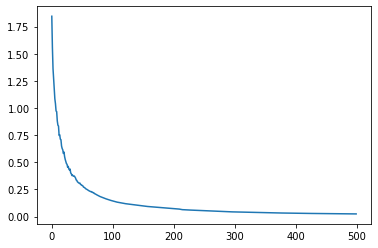

In [63]:
plt.plot(l)

In [66]:
model.summary()

W1 : (2700, 100)
A1 : (304, 100)
W2 : (100, 50)
A2 : (304, 50)
W3 : (50, 3)
Y_ : (304, 3)


In [67]:
def getAcc(x,y,model):
    outputs=model.predict(x)
    acc=np.sum(outputs==y)/y.shape[0]
    return acc
print("Train Acc %.4f"%getAcc(image_list,label_values1,model))

Train Acc 0.9901


In [68]:
class_names_inverse={0:'Bulbasaur', 1:'Charmander',2: 'Pikachu'}

In [69]:
p1=[]
for i in image_list1:
    p1.append(model.predict(i))

In [70]:
il=model.predict(image_list1)

In [71]:
predicted_values=[]

In [72]:
for i in il:
    predicted_values.append(class_names_inverse[i])

In [187]:
y_nn=pd.DataFrame(image_id,columns=["ImageId"])

In [188]:
y_nn["NameOfPokemon"]=predicted_values

In [189]:
y_nn.set_index("ImageId", inplace = True)

In [190]:
test_data_nn=pd.read_csv("Test/test.csv")

In [191]:
names_nn=[]

In [193]:
for i in test_data_nn["ImageId"]:
    names_nn.append(y_nn.loc[i]["NameOfPokemon"])

In [194]:
test_data_nn["NameOfPokemon"]=names_nn

In [195]:
test_data_nn.to_csv("submit_1_nn.csv",index=False)